In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [13]:
def drawimg(img,title="image"):
  plt.imshow(img,cmap="gray")
  plt.axis("off")
  plt.title(title+str(img.shape))
  plt.show()

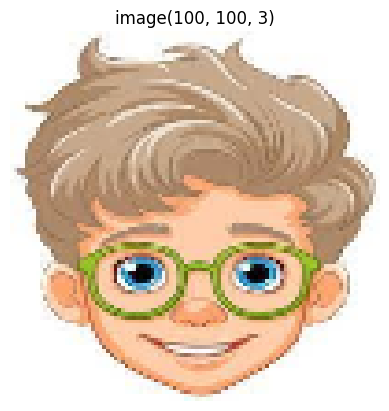

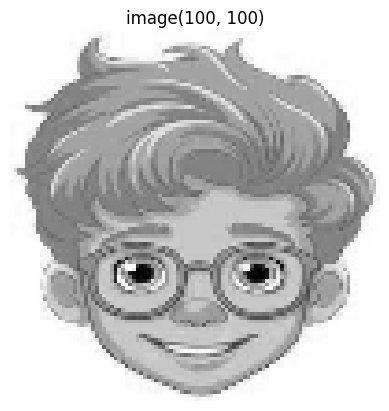

In [14]:
img_=cv2.imread("/content/gdrive/MyDrive/download.jpeg")
img_=cv2.cvtColor(img_,cv2.COLOR_BGR2RGB)
img_=cv2.resize(img_,(100,100))
img_gray= cv2.cvtColor(img_,cv2.COLOR_BGR2GRAY)
drawimg(img_)
drawimg(img_gray)

In [15]:
def convolution(img,img_filter):
  W=img.shape[0]
  H=img.shape[1]

  F=img_filter.shape[0]
  new_img=np.zeros((W-F+1,H-F+1))

  for row in range(W-F+1):
    for col in range(H-F+1):
      for i in range(F):
        for j in range(F):
          new_img[row][col] += img[row+i][col+j] * img_filter[i][j]

      if new_img[row][col] > 255:
        new_img[row][col] = 255

      elif new_img[row][col] < 0:
        new_img[row][col]=0

  return new_img

In [16]:
blur_filter = np.ones((3,3))/9.0
output1=convolution(img_gray,blur_filter)

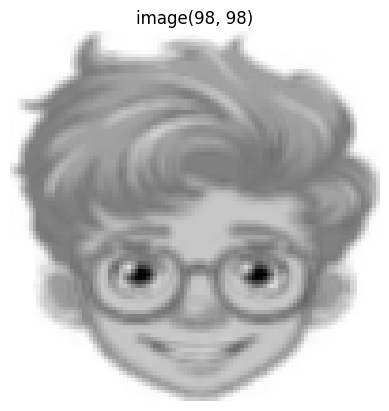

In [17]:
drawimg(output1)

In [18]:
edge_filter = np.array([[1,0,-1],
                        [1,0,-1],
                        [1,0,-1]])

output2 = convolution(img_gray,edge_filter)

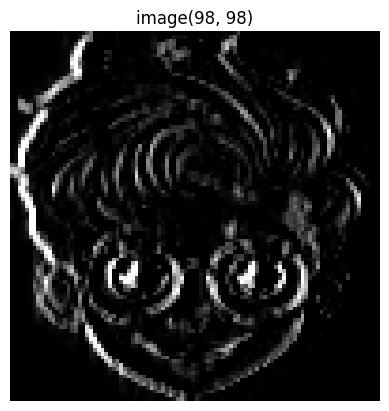

In [19]:
drawimg(output2)

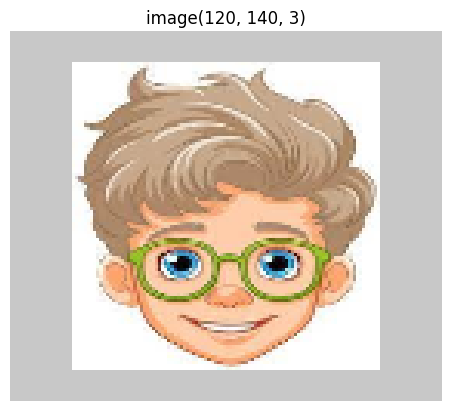

In [22]:
pad_img = np.pad(img_,((10,10),(20,20),(0,0)),'constant',constant_values=200)
drawimg(pad_img)


In [25]:
X =np.array([[1,0,2,3],
             [4,6,6,8],
             [3,1,1,0],
             [1,2,2,4]])
def pooling(X,mode="max"):
  stride=2
  f=2
  H,W=X.shape

  HO = int((H-f)/stride) + 1
  WO = int((W-f)/stride) + 1

  output=np.zeros((HO,WO))

  for r in range(HO):
    for c in range(WO):
      r_start = r*stride
      r_end= r_start+f
      c_start = c*stride
      c_end = c_start+f

      X_slice = X[r_start:r_end, c_start:c_end]
      if mode == 'max':
        output[r][c]=np.max(X_slice)
      else:
        output[r][c]=np.mean(X_slice)

  return output


In [26]:
pooling_output=pooling(X)
print(pooling_output)

[[6. 8.]
 [3. 4.]]
